# Ridge Regression vs Ordinary Least Squares

Inspired from this [scikit's learn example](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge_variance.html#example-linear-model-plot-ols-ridge-variance-py)


* Generate several sets of small samples with a bit of Normal Distribution noise
* Run a regression on each set with OLS and Ridge
* The Ridge coefficients are more robust, vary less, than the OLS ones


In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

from sklearn import linear_model




# The data

In [ ]:
# Create very simple arrays of 2 samples each
# Here we use np.c_ as a shortcut to create numpy arrays
# .T is the transpose operator  
X_train = np.c_[.5, 1].T
y_train = [.5, 1]
X_test = np.c_[0, 2].T


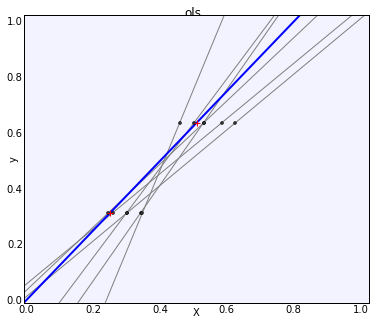

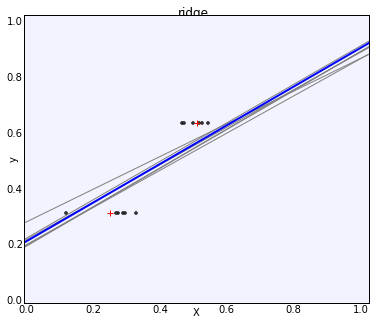

In [20]:
np.random.seed(0)
# Create a dictionary of classifiers, OLS and RIdge

classifiers = dict( ols=linear_model.LinearRegression(fit_intercept=True), 
                   ridge=linear_model.Ridge(alpha=.1) 
                  )

fignum = 1
# Loop over the 2 classifiers
for name, clf in classifiers.items():
    # Create a figure per classifier
    fig = plt.figure( fignum, figsize=(6, 5))
    ax = fig.add_subplot(211)
    plt.clf()
    plt.title(name)
    ax = plt.axes([.12, .12, .8, .8])

    # create 6 different sample sets
    for _ in range(6):
        # add noise to the original X_train 
        # X = X_train + N(0,1) / 10
        this_X = .1 * np.random.normal(size=(2, 1)) + X_train
        
        # Fit the model
        clf.fit(this_X, y_train)
        
        # Plot the samples
        ax.scatter(this_X, y_train, s=6, c='.5', marker='o', zorder=10)
        
        # plot the prediction 
        ax.plot(X_test, clf.predict(X_test), color='.5')
    
    clf.fit(X_train, y_train)
    
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color='blue')
    ax.scatter(X_train, y_train, s=30, c='r', marker='+', zorder=10)

    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_ylim((0, 1.6))
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.set_xlim(0, 2)
    fignum += 1

plt.show()